In [45]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
M_sol  = 1.99e30 #[M_sol] = Kg
R_sol  = 6.960e8 #[R_sol] = m
E_nuc  = 3.86e26 #[E_nuc] = kg m^2 / s^3 ----> este nro esta mal, hay q revisarlo
G      = 4.299e-6   # Unidades kpc * Msol^-1*(km/s)**2 -------------> estan mal las unidades de esto

ro_sol = 3.*M_sol/(4 * np.pi *R_sol**3)

M = M_sol*frange(0, 1.,0.02)
n = len(M)

#print M

In [47]:
r_3 = np.zeros(n)

for i in np.arange(n-1):
    r_3[i+1] = r_3[i] + 0.75*(M[i+1]-M[i])/(ro_sol*np.pi)

r = r_3**(1/3.)
#print r_3

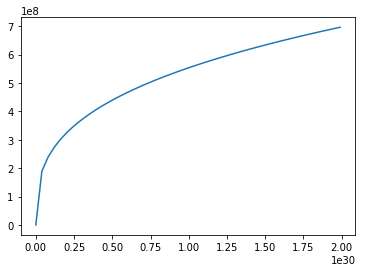

In [48]:
plt.plot(M,r)

In [49]:
L = np.zeros(n)

for i in np.arange(n-1):
    L[i+1] = L[i] + E_nuc*(M[i+1]-M[i])

print L

[0.000000e+00 1.536280e+55 3.072560e+55 4.608840e+55 6.145120e+55
 7.681400e+55 9.217680e+55 1.075396e+56 1.229024e+56 1.382652e+56
 1.536280e+56 1.689908e+56 1.843536e+56 1.997164e+56 2.150792e+56
 2.304420e+56 2.458048e+56 2.611676e+56 2.765304e+56 2.918932e+56
 3.072560e+56 3.226188e+56 3.379816e+56 3.533444e+56 3.687072e+56
 3.840700e+56 3.994328e+56 4.147956e+56 4.301584e+56 4.455212e+56
 4.608840e+56 4.762468e+56 4.916096e+56 5.069724e+56 5.223352e+56
 5.376980e+56 5.530608e+56 5.684236e+56 5.837864e+56 5.991492e+56
 6.145120e+56 6.298748e+56 6.452376e+56 6.606004e+56 6.759632e+56
 6.913260e+56 7.066888e+56 7.220516e+56 7.374144e+56 7.527772e+56
 7.681400e+56]


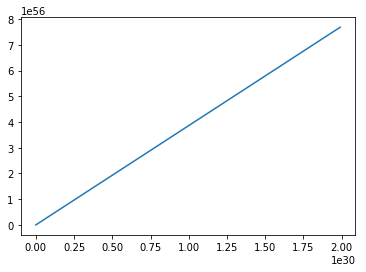

In [50]:
plt.plot(M,L)

In [54]:
P = np.zeros(n)

P[0] =  2.65e16 #[Presion en el centro del sol] = Kg / m*s^2

for i in np.arange(n-2):
    P[i+1] = ((M[i+2]-M[i+1])*0.5 - (M[i+1]-M[i])*0.5)

print P

[ 2.65000000e+16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.79609302e+12 -1.75921860e+13  1.75921860e+13 -1.75921860e+13
  1.75921860e+13  0.00000000e+00 -3.51843721e+13  3.51843721e+13
  0.00000000e+00  0.00000000e+00 -3.51843721e+13  3.51843721e+13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.03687442e+13  7.03687442e+13  7.03687442e+13 -1.40737488e+14
  7.03687442e+13  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.03687442e+13  7.03687442e+13  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.40737488e+14  1.40737488e+14  0.00000000e+00
  0.00000000e+00  1.40737488e+14 -1.40737488e+14 -1.40737488e+14
  1.40737488e+14  0.00000000e+00  0.00000000e+00]
